In [1]:
import pandas as pd
import numpy as np

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
!pip install pydot

In [4]:
# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Deep learning libraries 
#!pip install tensorflow==2.12.1
#!pip install keras==2.12.0

In [6]:
#!pip install scikeras

In [7]:
import tensorflow as tf 
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [8]:
(X_train_digit,Y_train_digit),(X_test_digit,Y_test_digit)=mnist.load_data()
# download dataset from mnist 
# The MNIST dataset contains only handwritten digits, specifically the numbers 0 through 9.
# In this line, the code separates X_train_digit, Y_train_digit, X_test_digit, and Y_test_digit. 
# & The data on the right side (returned by mnist.load_data()) is assigned to the variables on the left side.
# automatically separates the dataset into X_train_digit,Y_train_digit,X_test_digit,Y_test_digit
# X_train and X_test → pixel values of images (each image is 28×28 pixels)
# Y_train and Y_test → numbers (0–9) representing the digit

In [9]:
col_name=['zero','one','two','three','four','five','six','seven','eight','nine']
# X_train contains pixel values, and y_train contains numeric labels from 0 to 9. 
# That’s why we create a name label list like 'zero' to 'nine'—just to make the labels easier to read.
# it is not mandatory to creat a list number name label just for readability purpose

<function matplotlib.pyplot.show(close=None, block=None)>

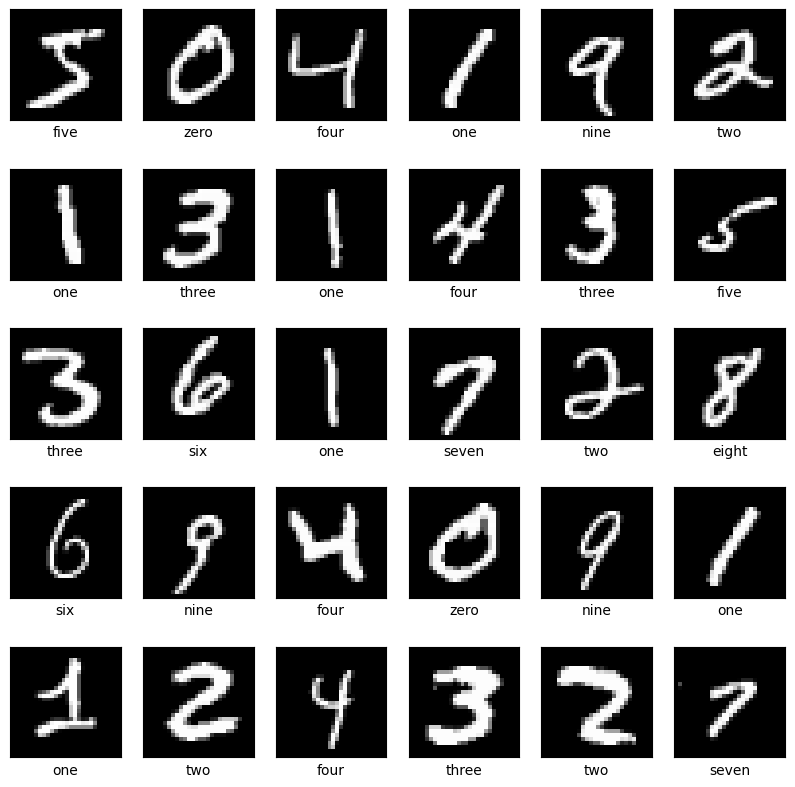

In [10]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_name[Y_train_digit[i]])
plt.show
# plt.figure() creates this canvas or a big poster.
# figsize=(width, height) sets the width and height of the whole canvas in inches.
# Example: figsize=(10,10) → 10 inches wide and 10 inches tall.
# In Matplotlib, subplot is used to divide a figure into multiple smaller plots (subplots).
# range 15 or 20 is taking 20 image from dataset.
# range 15 creating index value for the dataset (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) giving values for frist 15 image in the dataset 
# i+1 is creating position value for the subplot (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) giving values for the subplot creat in canvas
# range(15) creates index values for the dataset and positions for the subplots. 
# In Python, dataset indexes start from 0, while in Matplotlib, subplot positions start from 1.
# plt.xticks([]) → removes numbers from the x-axis.
# plt.yticks([]) → removes numbers from the y-axis.
# plt.imshow() → This displays the image in matplotlib.
# X_train_digit[i] → Display the image from X_train at a given index.
# plt.xlabel(col_name[Y_train_digit[i]]) - In python the X_train_digit contain only pixel values of number images so we taking the number from 
                                       # y_train_digits and numbers names form col_names to see the images   
# cmap='gray' → This shows the image in grayscale (black and white), instead of color. It is in matplotlib labrires.
# get the image from X_train → find its number in Y_train → show the name from col_name.

In [11]:
X_test_digit.shape

(10000, 28, 28)

In [12]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)
# reshape changes the shape of the dataset.
# ANN expects input data in 2D shape.

In [13]:
X_train_digit.shape

(60000, 784)

In [14]:
Y_train_digit.shape

(60000,)

In [15]:
Y_train_digit

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [16]:
Y_train_digit=to_categorical(Y_train_digit,num_classes=10)
Y_test_digit=to_categorical(Y_test_digit,num_classes=10)
# If we use get_dummies(), it gives output as a DataFrame, but in deep learning, the input and output should not be DataFrames. 
# That’s why we use to_categorical().
# to_categorical() only converts label into 0 and 1 and it is numpy array 
# num_classes create columns for each output labels

In [17]:
Y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [18]:
Y_train_digit.shape

(60000, 10)

In [19]:
model=keras.Sequential([
Dense(256,activation='relu',input_shape=(784,)),
layers.Dropout(0.3),
layers.BatchNormalization(),
Dense(64,activation='relu'),
layers.Dropout(0.3),
layers.BatchNormalization(),
Dense(10,activation='sigmoid'),
])
# keras.Sequential() = layers will be added one after another in order 
# A Dense layer (or fully connected layer) means every neuron in this layer is connected to every neuron in the previous layer.
# (784,) → putting a comma makes it a tuple.In Python, adding a comma after a number makes it a tuple with one item.
# 1D tuple must put a comma at the end.2D or more, the comma at the end is optional.
# tuple comma say 784 is not a number it is shape.
# layers dropout reduces value in epoches of val _accuracy example layers dropout is 0.3 it will reduce 0.3 in epoches val_accuracy=0.45 
# the final answer of epoch val_accuracy=0.15
# BatchNormalization - Taking mean + variance for each mini-batch and normalizes values(standardize the values.).
# Standardize.Formula = X-mean/variances.

C:\Users\Public\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,338 (856.79 KB)

 Trainable params: 218,698 (854.29 KB)

 Non-trainable params: 640 (2.50 KB)

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
# Without compile(), the model doesn’t know how to train.
# Loss function → how the model measures its mistakes.Example: categorical_crossentropy, mse
# Optimizer → how the model updates weights to improve.Example: adam, sgd
# Metrics → how you want to measure performance.Example: accuracy
# compile() is the function in Keras that prepares the model for training.
# compile combines loss function,optimizer,metrics.
# A loss function has many types, and one of them is categorical crossentropy.
# A loss function measures how wrong the model’s predictions.
# Categorical crossentropy is a loss function used for multi-class labels.
# categorical crossentropy is a formula used as a loss function for multi-class outputs.
# The optimizer update the weights of the neural network,There are many types of optimizer.
# Metrics tell you how many predictions were correct (example like Accuracy,Precision/Recall). 

In [22]:
history= model.fit(X_train_digit,Y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,Y_test_digit))
# Batch_size batch size of 100 and 60000 training samples, the model trains on 100 samples at a time over 600 batches to complete one epoch.
# One batch means the model takes that batch of samples (e.g., 100), performs feedforward and backpropagation on it, 
# and then moves to the next batch until all 600  batches are done, completing one epoch.
# validation_data take a part dataset from the test dataset to test the model during training.
# Validation data = a mini-test from the training set to check how the model is studying.
# Epoch: One complete pass of the model through the entire training dataset.
# Epoch: model read the full training dataset is called one epoch
# One epoch means the model has seen and processed the entire training dataset once.

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8852 - loss: 0.3934 - val_accuracy: 0.9608 - val_loss: 0.1307
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9447 - loss: 0.1924 - val_accuracy: 0.9661 - val_loss: 0.1071
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9551 - loss: 0.1512 - val_accuracy: 0.9701 - val_loss: 0.0963
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9610 - loss: 0.1290 - val_accuracy: 0.9755 - val_loss: 0.0864
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9658 - loss: 0.1152 - val_accuracy: 0.9760 - val_loss: 0.0779
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9687 - loss: 0.1040 - val_accuracy: 0.9765 - val_loss: 0.0777
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9716 - loss: 0.0943 - val_accuracy: 0.9781 - val_loss: 0.0788
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9732 - loss: 0.0891 - val_accuracy: 0.

In [23]:
y_predict=model.predict(X_test_digit)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[9.97448489e-02, 2.45710447e-01, 5.51177740e-01, ...,
        9.99998748e-01, 2.10324470e-02, 9.74719942e-01],
       [7.61074066e-01, 9.79976535e-01, 9.99999344e-01, ...,
        4.58822608e-01, 2.00273260e-01, 2.74404418e-04],
       [2.03879058e-01, 9.99996960e-01, 7.59366989e-01, ...,
        6.11400247e-01, 3.78581822e-01, 1.17827011e-02],
       ...,
       [2.14753971e-01, 3.83961946e-01, 1.17989533e-01, ...,
        6.14749551e-01, 1.02074742e-01, 9.90929365e-01],
       [2.68242210e-01, 4.39442806e-02, 1.29364477e-03, ...,
        7.84596726e-02, 8.41864109e-01, 1.30594345e-02],
       [8.64429116e-01, 2.11536209e-03, 3.64394665e-01, ...,
        6.11466775e-03, 2.21564233e-01, 1.72016025e-01]],
      shape=(10000, 10), dtype=float32)

In [24]:
y_predict=np.argmax(y_predict,axis=1)
Y_test_digit_eval=np.argmax(Y_test_digit,axis=1)
# np.argmax(y_predict, axis=1) finds the index of the highest value in each row of y_predict.
# np.argmax(Y_test_digit,axis=1) finds the index of the highest value in each row of Y_test_digit
# argmax finds the index of the biggest value in the predicted probabilities to get the predicted class, 
# and it also finds the index of 1 in the one-hot encoded true label to get the actual class; 
# if the predicted class index matches the actual class index, the prediction is correct, otherwise it is wrong
# np.argmax check the biggest index value 1 is present at position of 6.
# np.argmax(y_predict, axis=1) → gives the label (class) corresponding to the highest value in that row

In [25]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [26]:
Y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


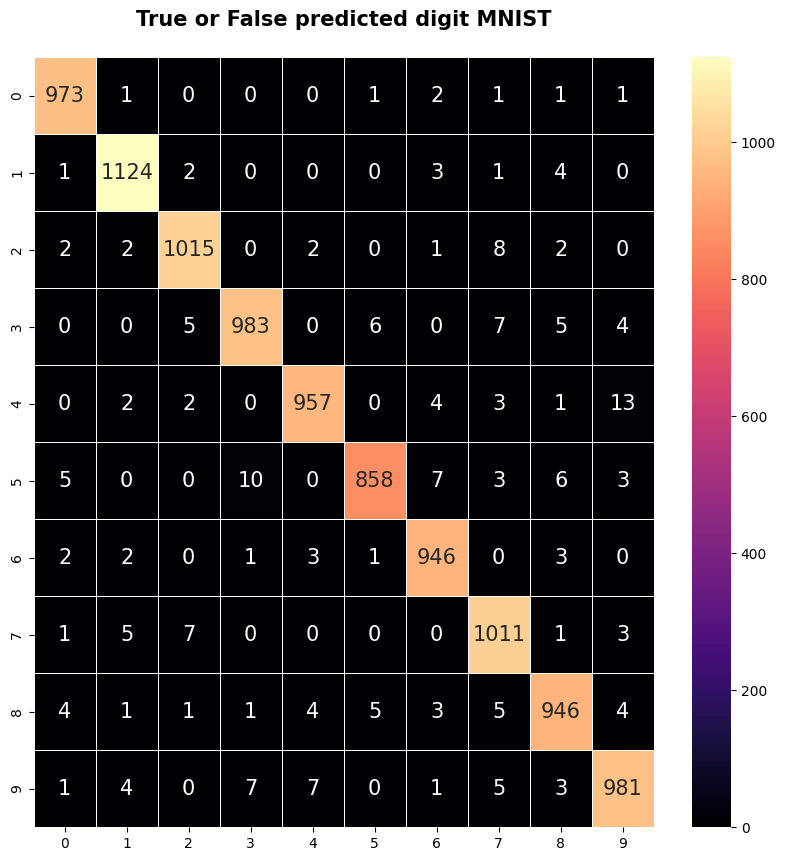

In [28]:
con_mat = confusion_matrix(Y_test_digit_eval,y_predict)
plt.style.use('fast')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidth = 0.5,fmt='d',cmap='magma')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()
# The confusion matrix combines the true labels (Y_test_digit_eval) and the predicted labels (y_predict) into one table.
# plt.style.use('fast') → Sets the look / theme of the plot (colours, fonts, grid style).
# plt.figure(figsize=(10,10)) → Sets how big the plotting area (canvas) will be (10 inches by 10 inches in this case).
# sns.heatmap(con_mat, ...)
# con_mat is your data (for example, a confusion matrix). The heatmap will visualize this matrix.
# annot=True - Shows the actual numbers inside each box of the heatmap (so you can read the values).
# annot_kws={'size':15} - Sets the font size of those numbers inside the boxes to 15 (so they’re easier to read).
# linewidth=0.5 - Adds thin white lines (0.5 thick) between the boxes, to separate them clearly.
# fmt='d' - Formats the numbers as integers (whole numbers). For example, it shows 5 instead of 5.0.
# cmap='magma' - Chooses the color style (called a colormap). "magma" goes from dark purple to bright yellow.
# plt.title('True or False predicted digit MNIST\n') - This is the text that will appear at the top of your plot.
# The \n at the end just means “new line” — it adds a little extra space below the title.
# fontweight='bold' - Makes the title bold (thicker text).
# fontsize=15 - Makes the title text bigger (size 15).

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_digit_eval,y_predict))
# Metrics - A way to measure how well your model is doing (accuracy,r2)
# Parameters - The values the model learns from data (bias) 
# Hyperparameters - Settings that you choose before training to control how the model learns
# Hyperparameters - Something that affects learning (like batch size, epochs, learning rate)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [30]:
print(history.history.keys())
# The keys are the names of the metrics or values the model tracked during training.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


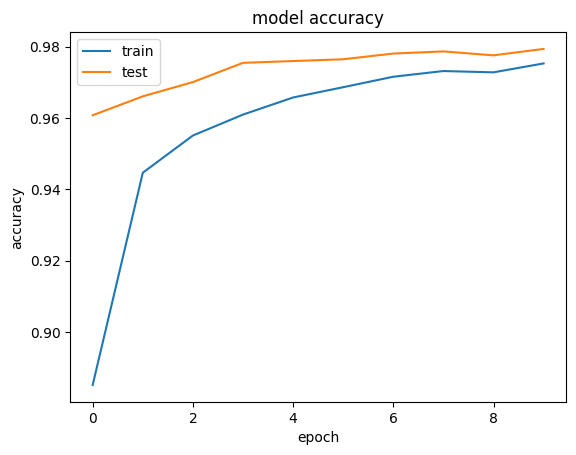

In [31]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test',],loc='best')
plt.show()
# If I use plt.plot() by itself, it will draw the graph
# Accuracy - list of accuracy values on the training data for each epoch.
# batch_size = 100 means take 100 dataset form 60000 training dataset. it will take 100 dataset for 600 times.
# batch_size = if the batch_size finished 600 times it is called one epoch and give accuracy value[it is called accuracy value from training dataset]
# Val_accuracy - validation data is used to calculate val_accuracy after every epoch finishes..
# legent =  Legend = a small box on the graph.It tells which line represents what:First line → training accuracy (or whatever you label it)
# Second line → validation accuracy (or whatever you label it)
# loc='best' → put the box in the clearest spot automatically
# loc='upper right' → put the box in the top-right corner
# loc='lower left' → put the box in the bottom-left corner

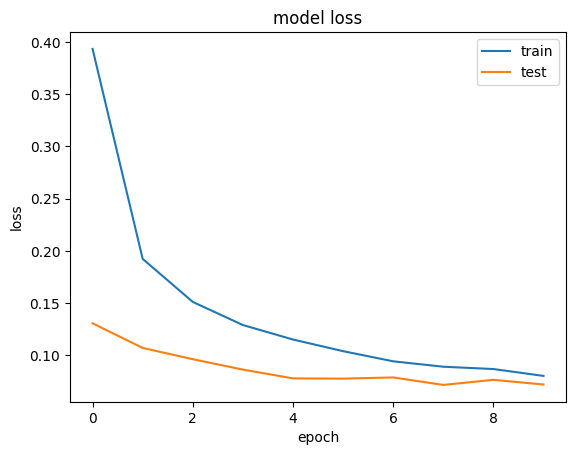

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()
# Loss - list of error values on the training data for each epoch.
# batch_size = 100 It means take 100 dataset form 60000 training dataset. it will take 100 dataset for 600 times.
# batch_size = if the batch_size finished 600 times it is called one epoch and give accuracy value[it is called accuracy value from training dataset]
# Val_loss - list of error values on the validation data for each epoch.

In [33]:
# tf.expad_do,s(x_test_digit[0])
y_predict_single=model.predict(X_test_digit[[2]])
y_predict_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(Y_test_digit[[2]],axis=1)
y_predict_single
# Take the 3rd image and predict it.
# Take the highest value for each image across the columns.
# Take the true label of the 3rd image and find which digit it represents.
# To check both variable y_predict_single and y_test_digit_eval

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([1])

In [34]:
y_test_digit_eval

array([1])

IndexError: index 2 is out of bounds for axis 0 with size 1

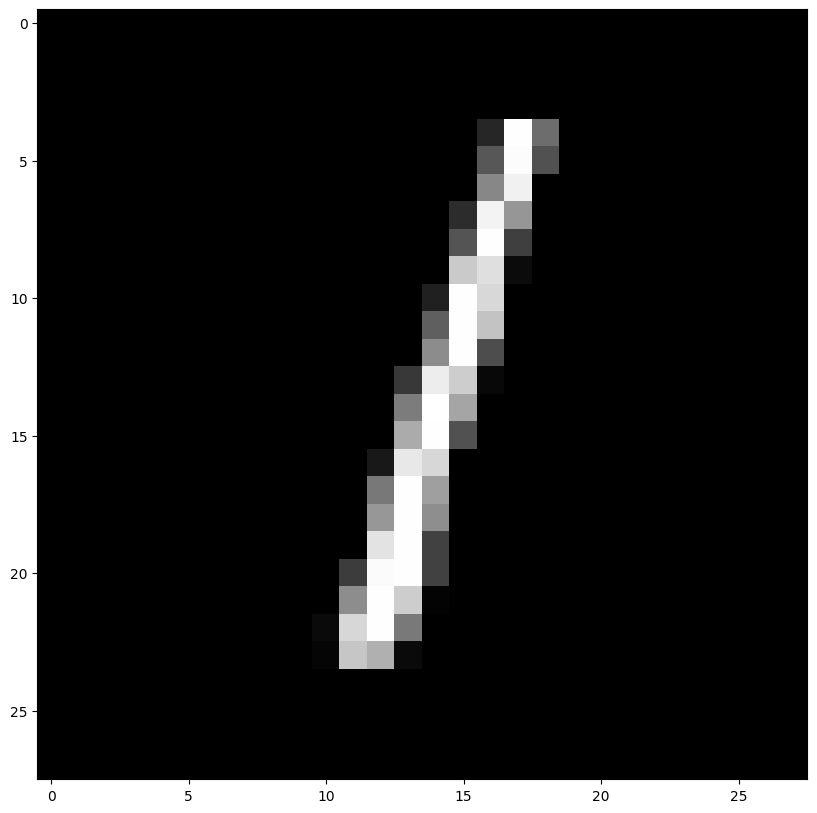

In [36]:
# name of number in the dataset in order 
col_names =['Zero','one','two','three','four','five','six','seven','eight','nine']
plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel('Actual:{},pred={}'.format(col_names[np.argmax(Y_test_digit[2])],col_names[y_predict_single[0]]))
plt.show()
# imshow is a function in Matplotlib used to display an image from an array.
# The 3rd test image (X_test_digit[2]) is reshaped to 28×28 and shown in grayscale, and its label (Y_test_digit[2]) is stored in one-hot encoding.
# format() is a Python string method that inserts number values into a string sentences.
# reshape -  Because reshape the dataset so that only can able to view the image of the output label
# For calculation the dataset must be (784,60000) and to see it in image the dataset must be (28*28)
# y_predict_single[0] because in y_predict_single has total one image only.